# Python для анализа данных


## Что такое анализ текстов и как с этим разобраться

В анализе данных как дисциплине существует отдельная область знания, занимающаяся анализом текстовых данных. Называется она NLP (Нет, это не нейролингвистическое программирование) == Natural Language Processing == Обработка естественного языка. NLP - область машинного обучения, дающая компьютеру возможность "понимать", анализировать, преобразовывать и  генерировать текст на человеческом языке.

**Реальные задачи NLP**

* Поиск информации (Yandex находит релевантные и похожие результаты).
* Извлечение информации (Mail структурирует события из электронных писем).
* Машинный перевод (Google Translate переводит язык с одного языка на другой).
* Упрощение текста (Rewordify упрощает смысл предложений). 
* Анализ тональности (Hater News дает нам настроение пользователя).
* Краткое изложение текста (Smry или Reddit's autotldr дает краткое изложение предложений).
* Спам-фильтр (Gmail фильтрует спам-письма).
* Прогнозирование следующих слов (поиск в Google/Yandex/Yahoo предсказывает результаты поиска пользователей).
* Автоисправление (Google Keyboard и Grammarly редактируют неправильно написанные слова).
* Распознавание речи (Алиса :)).
* Ответ на вопрос (ответы IBM Watson).
* Natural Language Generation (Генерация текста из изображения или видео.)

Мы воспользуемся модулем **TextBlob**, который представляет собой библиотеку Python и предлагает простой API для доступа к его методам и выполнения основных задач NLP. Он построен поверх модуля NLTK (Natural Language Toolkit)

 Сейчас будем устанавливать библиотеку TextBlob и всякие элементы nltk, необходимые для ее работы. Предупреждаю, это долго

In [1]:
!pip install -U textblob
!python -m textblob.download_corpora

  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.5
    Uninstalling nltk-3.6.5:
      Successfully uninstalled nltk-3.6.5
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


**Термины:**

* **Корпус** — Основная часть текста, единственное число. Корпора - множественное число.
* **Лексикон** — Слова и их значения.
* **Токен** — каждая «сущность», которая является частью того, что было разделено на основе правил. Например, каждое слово является токеном, когда предложение «токенизируется» на слова. Каждое предложение – токен, если вы токенизировали предложения из абзаца.

## Токенизация

Под токенизацией понимается разбиение большого абзаца на предложения или слова. Обычно токен – слово в текстовом документе. Токенизация с помощью TextBlob – довольно простая штука. Все, что вам нужно сделать, это импортировать объект TextBlob из библиотеки textblob, передать ему документ, который вы хотите разбить на токены и готово :). Давайте посмотрим на это в действии:

In [2]:
from textblob import TextBlob

In [3]:
document = (" В первый раз я встретился с бульдогом, так сказать, лицом к лицу  много \
лет тому назад. В ту пору я жил на даче вместе с  одним  из  моих  друзей, \
одиноким молодым человеком, которого звали Джорджем.  Однажды  вечером  мы \
пошли смотреть туманные картины и вернулись домой  поздно,  когда  хозяева \
уже спали. Правда, они не забыли оставить в нашей комнате зажженную свечу. \
Мы прошли к себе, сели и стали снимать ботинки..") 

In [7]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

Передадим этот документ в качестве параметра классу TextBlob. Возвращенный объект затем можно использовать для токенизации на слова и предложения.

In [8]:
text_blob_object = TextBlob(document)

In [9]:
text_blob_object[12:25]

TextBlob("з я встретилс")

In [10]:
document_sentence = text_blob_object.sentences
print(document_sentence)
print(len(document_sentence))

[Sentence(" В первый раз я встретился с бульдогом, так сказать, лицом к лицу  много лет тому назад."), Sentence("В ту пору я жил на даче вместе с  одним  из  моих  друзей, одиноким молодым человеком, которого звали Джорджем."), Sentence("Однажды  вечером  мы пошли смотреть туманные картины и вернулись домой  поздно,  когда  хозяева уже спали."), Sentence("Правда, они не забыли оставить в нашей комнате зажженную свечу."), Sentence("Мы прошли к себе, сели и стали снимать ботинки..")]
5


In [11]:
document_sentence[0].words

WordList(['В', 'первый', 'раз', 'я', 'встретился', 'с', 'бульдогом', 'так', 'сказать', 'лицом', 'к', 'лицу', 'много', 'лет', 'тому', 'назад'])

In [12]:
document_words = text_blob_object.words

print(document_words)
print(len(document_words))

['В', 'первый', 'раз', 'я', 'встретился', 'с', 'бульдогом', 'так', 'сказать', 'лицом', 'к', 'лицу', 'много', 'лет', 'тому', 'назад', 'В', 'ту', 'пору', 'я', 'жил', 'на', 'даче', 'вместе', 'с', 'одним', 'из', 'моих', 'друзей', 'одиноким', 'молодым', 'человеком', 'которого', 'звали', 'Джорджем', 'Однажды', 'вечером', 'мы', 'пошли', 'смотреть', 'туманные', 'картины', 'и', 'вернулись', 'домой', 'поздно', 'когда', 'хозяева', 'уже', 'спали', 'Правда', 'они', 'не', 'забыли', 'оставить', 'в', 'нашей', 'комнате', 'зажженную', 'свечу', 'Мы', 'прошли', 'к', 'себе', 'сели', 'и', 'стали', 'снимать', 'ботинки']
69


In [13]:
type(document_words[0])

textblob.blob.Word

In [14]:
obj = TextBlob("I'd like some coffee")
obj.words

WordList(['I', "'d", 'like', 'some', 'coffee'])

**Лемматизация**

Лемматизация – приведение слова к форме, в которой оно записано в словаре.

Чтобы выполнить лемматизацию с помощью TextBlob, вы должны использовать объект Word из библиотеки textblob, передать ему слово, которое вы хотите лемматизировать, а затем вызвать метод lemmatize.

In [15]:
from textblob import Word

word1 = Word("apples")
print("apples:", word1.lemmatize())

word2 = Word("media")
print("media:", word2.lemmatize())

word3 = Word("greater")
print("greater:", word3.lemmatize("a"))

apples: apple
media: medium
greater: great


In [16]:
word3 = Word("greater")
print("greater:", word3.lemmatize())

greater: greater


In [17]:
word2 = Word("nebulae")
print("nebulae:", word2.lemmatize())

nebulae: nebula


В приведенном выше сценарии мы выполняем лемматизацию слов «apples», «media» и «greater». В выходных данных вы видите слова «apple» (в единственном числе), «medium» (в единственном числе) и «great» (безотносительно степени, как в слове «greater»). Обратите внимание, что для слова «greater» мы передаем «a» в качестве параметра методу лемматизации. Это конкретно говорит методу, что слово следует рассматривать как прилагательное (adjective). По умолчанию метод lemmatize () слова считает слова существительными . Полный список частей речевых компонентов выглядит следующим образом:

ADJ, ADJ_SAT, ADV, NOUN, VERB

## Преобразование текста в единственном и множественном числе

TextBlob также позволяет вам преобразовывать слова текста во множественное или единственное число, используя методы pluralize и singularize, соответственно. Пример:

In [18]:
text = ("Football is a good game. It has many health benefits")
text_blob_object = TextBlob(text)
print(text_blob_object.words.pluralize())

text = ("Footballs is a goods games. Its has many healths benefits")
text_blob_object = TextBlob(text)
print(text_blob_object.words.singularize())

['Footballs', 'iss', 'some', 'goods', 'games', 'Its', 'hass', 'manies', 'healths', 'benefitss']
['Football', 'is', 'a', 'good', 'game', 'It', 'ha', 'many', 'health', 'benefit']


In [20]:
text = ("nebula")
text_blob_object = TextBlob(text)
text_blob_object.words.pluralize()

WordList(['nebulae'])

## Поиск N-грамм

N-граммы – комбинации n рядом стоящих слов в предложении. Например, для предложения «Я люблю смотреть футбол» биграммы будут такие:

(я люблю), (люблю смотреть) и (смотреть футбол). N-граммы часто играют решающую роль при классификации текстов.

В TextBlob N-граммы можно найти, передав число N в метод ngrams объекта TextBlob. Пример:

In [21]:
text = "Who could ponder equations when he had a chance to imagine dragons. Never have i tried to do so."
text_blob_object = TextBlob(text)
for ngram in text_blob_object.ngrams(2):
    print(ngram)

['Who', 'could']
['could', 'ponder']
['ponder', 'equations']
['equations', 'when']
['when', 'he']
['he', 'had']
['had', 'a']
['a', 'chance']
['chance', 'to']
['to', 'imagine']
['imagine', 'dragons']
['dragons', 'Never']
['Never', 'have']
['have', 'i']
['i', 'tried']
['tried', 'to']
['to', 'do']
['do', 'so']


## Исправление орфографии

Корректировка орфографии является одной из уникальных функций библиотеки TextBlob. С помощью соответствующего метода объекта TextBlob вы можете исправить все орфографические ошибки в вашем тексте. Пример:

In [22]:
text = "I lоve to watсhf footbal, but I have neter played it"
text_blob_object = TextBlob(text)

print(text_blob_object.correct())

I love to watch football, but I have never played it


## Анализ тональности

В этом разделе мы проанализируем мнение общественности о различных продуктах, купленных через Amazon. Для этого мы будем использовать анализатор тональности TextBlob.

Набор данных можно скачать по этой [ссылке](https://www.kaggle.com/sdxingaijing/topic-model-lda-algorithm/data) .

В качестве первого шага нам нужно импортировать набор данных. Мы импортируем только первые 20 000 - слишком уж большие данные. Вы можете импортировать больше записей, если хотите. Следующий скрипт импортирует набор данных:

In [24]:
import pandas as pd

reviews_datasets = pd.read_csv('Reviews.csv')
reviews_datasets = reviews_datasets.head(20000)

In [25]:
reviews_datasets.dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa..."


Текстовый обзор о еде содержится в столбце «Text». Столбец Score содержит оценки пользователя для конкретного продукта, где 1 - самый низкий, а 5 - самый высокий рейтинг.

Давайте посмотрим распределение рейтинга:

<AxesSubplot:xlabel='Score', ylabel='Count'>

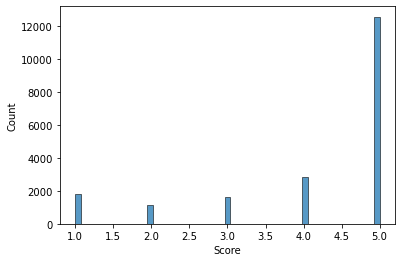

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.histplot(reviews_datasets['Score'])

Видно, что большинство рейтингов позитивные (==5). Давайте построим гистограмму для рейтингов, чтобы взглянуть на количество записей для каждого рейтинга.

<AxesSubplot:xlabel='Score', ylabel='count'>

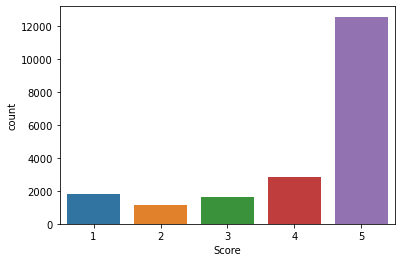

In [28]:
sns.countplot(x='Score', data=reviews_datasets)

Посмотрим глазами на произвольный отзыв

In [29]:
reviews_datasets[reviews_datasets.index==349]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
349,350,B00067AD4U,A2LYOWC3FC73XK,"Michael Ekstrum ""expresso bean fan""",1,1,5,1178928000,excellent - exactly what I expected,The product was exactly as advertised and fres...


Похоже, что отзыв положительный. Давайте проверим это с помощью библиотеки TextBlob. Чтобы найти тональность, мы должны использовать атрибут sentiment объекта TextBlob. Объект sentiment возвращает кортеж, который с тональностью и субъективностью отзыва.

Значение тональности может быть между -1 и 1, когда отзывы отрицательные, и тональность должна быть <0, когда же отзывы положительнеые, и тональность должна быть >0.

Значение субъективности может быть между 0 и 1. Субъективность количественно определяет долю личного мнения и фактической информации, содержащейся в тексте. Более высокая субъективность означает, что текст содержит личное мнение, а не фактическую информацию.

In [30]:
reviews_datasets['Text'][350]

'These chocolate covered espresso beans are wonderful!  The chocolate is very dark and rich and the "bean" inside is a very delightful blend of flavors with just enough caffine to really give it a zing.'

In [31]:
text_blob_object = TextBlob(reviews_datasets['Text'][350])
print(text_blob_object.sentiment)

Sentiment(polarity=0.39666666666666667, subjectivity=0.6616666666666667)


Отзыв положительный с высокой субъективностью.

Давайте добавим столбец тональности в наш набор данных.

In [32]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

reviews_datasets['Sentiment_Polarity'] = reviews_datasets['Text'].apply(find_polarity)
reviews_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333


Посмотрим на распределение отзывов по полярности:

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Count'>

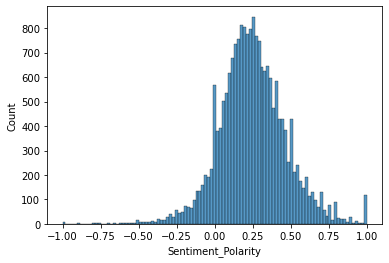

In [33]:
sns.histplot(reviews_datasets['Sentiment_Polarity'])

Из приведенного выше рисунка видно, что большинство отзывов являются положительными и имеют полярность от 0 до 0,5. Это естественно, так как большинство отзывов в наборе данных имеют 5-звездочные рейтинги.

Давайте построим среднюю полярность для каждого рейтинга.

<AxesSubplot:xlabel='Score', ylabel='Sentiment_Polarity'>

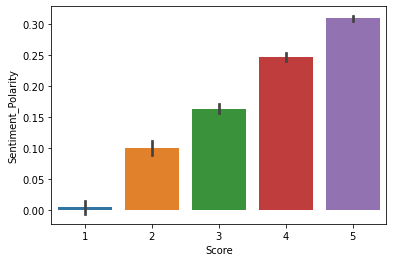

In [34]:
sns.barplot(x='Score', y='Sentiment_Polarity', data=reviews_datasets)

Результат показывает, что отзывы с высокими баллами имеют высокую положительную полярность.

Давайте теперь посмотрим на некоторые из самых негативных отзывов, то есть на отзывы с полярностью -1.

In [35]:
most_negative = reviews_datasets[reviews_datasets.Sentiment_Polarity == -1].Text.head()
print(most_negative)

545     These chips are nasty.  I thought someone had ...
1083    All my fault. I thought this would be a carton...
1832    Pop Chips are basically a horribly over-priced...
2087    I do not consider Gingerbread, Spicy Eggnog, C...
2763    This popcorn has alot of hulls I order 4 bags ...
Name: Text, dtype: object


In [36]:
reviews_datasets['Text'][545]

'These chips are nasty.  I thought someone had spilled a drink in the bag, no the chips were just soaked with grease.  Nasty!!'

Фу, читать противно.

Посмотрим лучше на что-то позитивное:

In [37]:
most_positive = reviews_datasets[reviews_datasets.Sentiment_Polarity == 1].Text.head()
print(most_positive)

106     not what I was expecting in terms of the compa...
223     This is an excellent tea.  One of the best I h...
338     I like a lot of sesame oil and use it in salad...
796     My mother and father were the recipient of the...
1031    The Kelloggs Muselix are delicious and the del...
Name: Text, dtype: object


Пункт 106 немного настораживает. Посмотрим на него внимательно:

In [38]:
reviews_datasets['Text'][106]

"not what I was expecting in terms of the company's reputation for excellent home delivery products"

Отзыв не слишком уж положительный, но ему была назначена полярность 1 из-за присутствия таких слов, как «excellent» и «reputation». Важно знать, что анализатор настроений не на 100% защищен от ошибок и в некоторых случаях может предсказать неверную тональность. Но и правильно предсказывать он тоже умеет :)

In [39]:
reviews_datasets['Text'][223]

'This is an excellent tea.  One of the best I have ever had.  It is especially great when you prepare it with a samovar.'

Давайте разберем на примере

In [40]:
from textblob import TextBlob

TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

[Здесь](https://github.com/sloria/TextBlob/blob/eb08c120d364e908646731d60b4e4c6c1712ff63/textblob/en/en-sentiment.xml) можно посмотреть слова, по которым он это делает.

In [41]:
TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [42]:
TextBlob("isn't good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Так, добавление not умножает полярность на -0.5

In [43]:
TextBlob("very good").sentiment.polarity

0.9099999999999999

А еще у некоторых слов есть свойство intensity. только что наша полярность умножилась именно на нее

In [44]:
TextBlob("not very great").sentiment

Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)

Артикли и вспомогательные слова TextBlob игнорирует. А вот модификация здесь произошла хитрым образом:
    
* **polarity** = **-0.5**(not)***1/1.3**(very)***0.8**(great)
* **subjectivity** = **1/1.3**(very)***0.75**(great)

In [45]:
TextBlob("very")

TextBlob("very")

А вот этого слова нет в словаре. И поэтому ничего не происходит)

In [46]:
TextBlob("abominable").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [47]:
TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Как видите, все усреднилось:

In [48]:
TextBlob("great good").sentiment

Sentiment(polarity=0.75, subjectivity=0.675)